In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

### Acknowledgements

It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# Metadata

- **RowNumber** — corresponds to the record (row) number and has no effect on the output.  
- **CustomerId** — contains random values and has no effect on customer leaving the bank.  
- **Surname** — the surname of a customer has no impact on their decision to leave the bank.  
- **CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.  
- **Geography** — a customer’s location can affect their decision to leave the bank.  
- **Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank.  
- **Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.  
- **Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.  
- **Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.  
- **NumOfProducts** — refers to the number of products that a customer has purchased through the bank.  
- **HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.  
- **IsActiveMember** — active customers are less likely to leave the bank.  
- **EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.  
- **Exited** — whether or not the customer left the bank.  
- **Complain** — customer has complaint or not.  
- **Satisfaction Score** — score provided by the customer for their complaint resolution.  
- **Card Type** — type of card held by the customer.  
- **Points Earned** — the points earned by the customer for using a credit card.  y customers as possible.
e.
## Acknowledgements


# Loading Data

In [6]:
df=pd.read_csv("C:/Users/ngaut/Documents/Final Project/Bank Customer-Churn-Records.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
df.shape

(10000, 18)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [9]:
def get_all_value_counts(df):
    value_counts_dict = {}
    for column in df.columns:
        value_counts_dict[column] = df[column].value_counts()
    return value_counts_dict

# Example usage:
all_value_counts = get_all_value_counts(df)
for column, counts in all_value_counts.items():
    print(f"Value counts for '{column}':\n{counts}\n")


Value counts for 'RowNumber':
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

Value counts for 'CustomerId':
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

Value counts for 'Surname':
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

Value counts for 'CreditScore':
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

Value counts for 'Geography':
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int6

In [10]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## Distribution of Target Variable - Exited

In [13]:

print(df['Exited'].value_counts())

#Expressing the target variable as a percentage
print("------------------------------------------------------------")
print("Expressing distribution of target variable as a percentage")
print(100*df['Exited'].value_counts()/len(df['Exited']))

Exited
0    7962
1    2038
Name: count, dtype: int64
------------------------------------------------------------
Expressing distribution of target variable as a percentage
Exited
0    79.62
1    20.38
Name: count, dtype: float64


The distribution of target variable (Exited) is 80% (0 - have not exited) and 20%(1 - have exited)

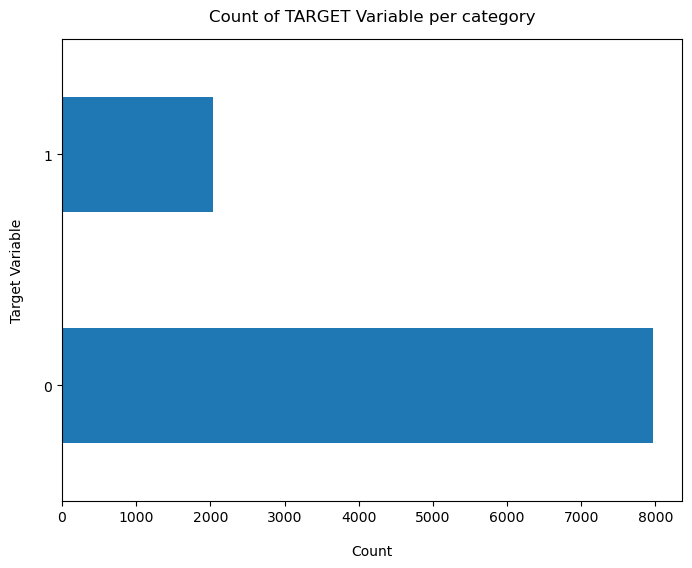

In [15]:
df['Exited'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

0 is more dominated in the distribution

### Pointplot shows the absence of missing values in the dataframe

# Data Cleaning

In [19]:
df_copy = df.copy()
df_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [20]:
df_copy.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [21]:
#Concise Summary of the dataframe
df_copy.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

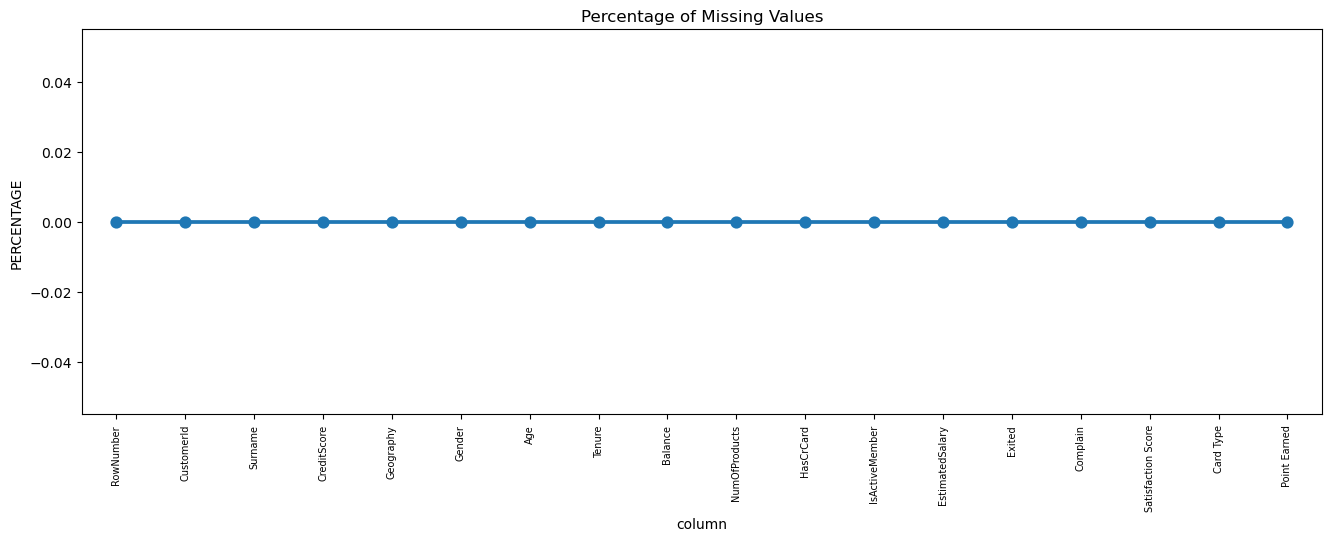

In [22]:
#Pointplot to ddnote missing points

missing = pd.DataFrame({'column': df_copy.columns, 'missing_percent': (df.isnull().sum() * 100) / df_copy.shape[0]})
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percent', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()


In [23]:
print("Tenure:")
df_copy["Tenure"].unique()

Tenure:


array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [24]:
# Define the function to categorize tenure add a new column TenureCategory
def categorize_tenure(tenure):
    if tenure == 0:
        return "New customer(< 0yrs)"
    elif 1 <= tenure <= 3:
        return "Short-term( 1 - 3 yrs)"
    elif 4 <= tenure <= 6:
        return "Mid-term (4 - 6 yrs)"
    else:
        return "Long-term (7 to 10 yrs)"

# Apply the function to the 'Tenure' column in df_copy and create a new column 'TenureCategory'
df_copy['TenureCategory'] = df_copy['Tenure'].apply(categorize_tenure)

# Display the updated DataFrame to confirm
df_copy.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,TenureCategory
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Short-term( 1 - 3 yrs)
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Short-term( 1 - 3 yrs)
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Long-term (7 to 10 yrs)
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Short-term( 1 - 3 yrs)
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Short-term( 1 - 3 yrs)


# EDA

## Univariate Analysis 

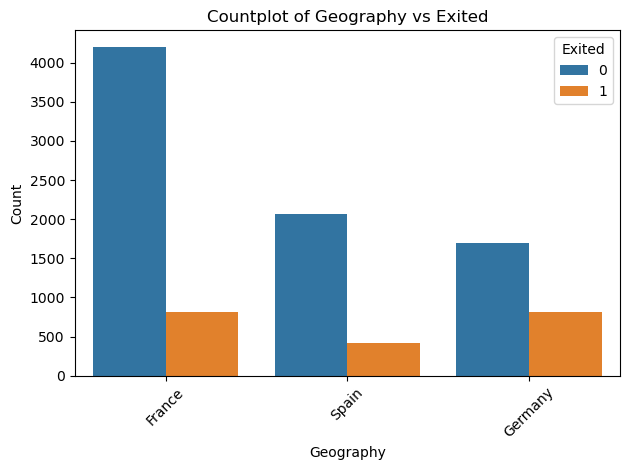

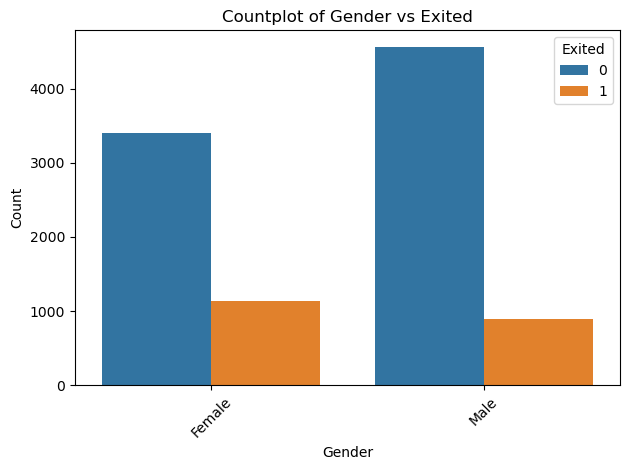

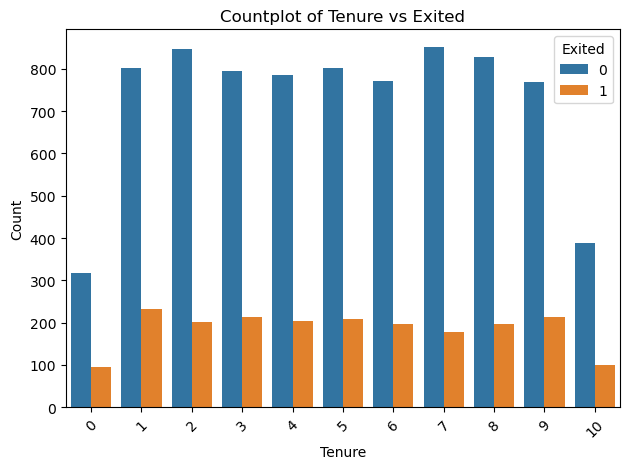

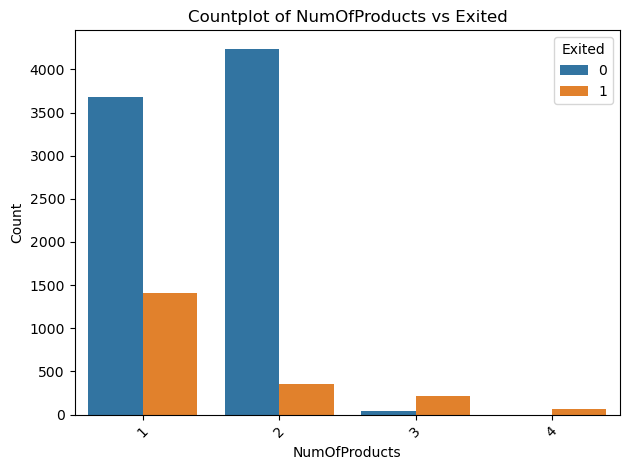

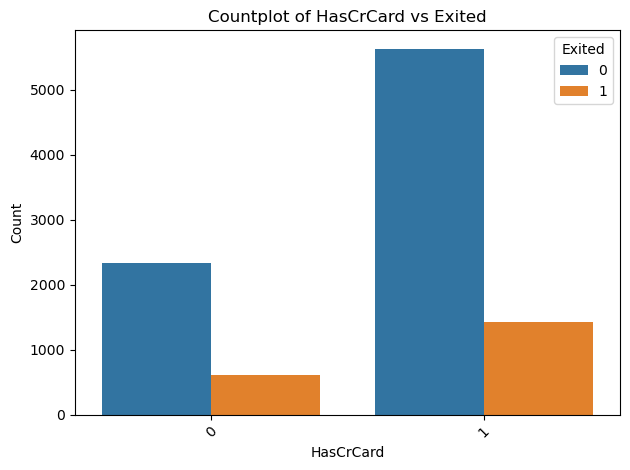

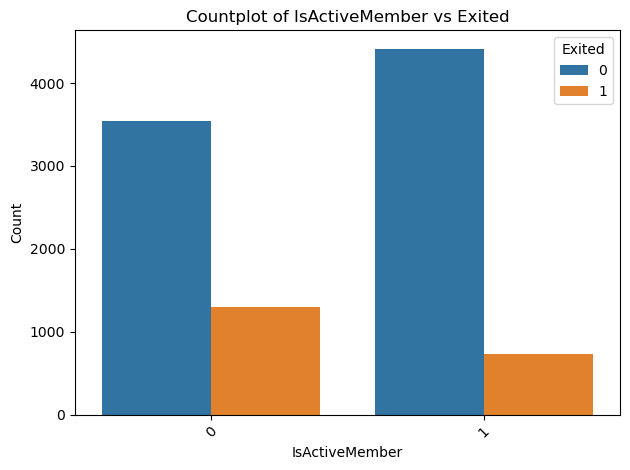

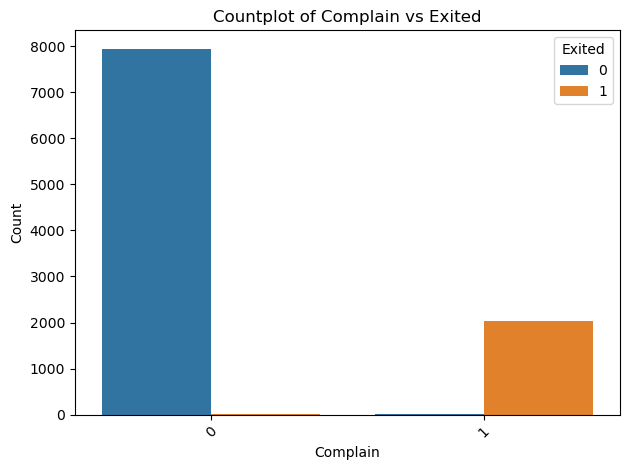

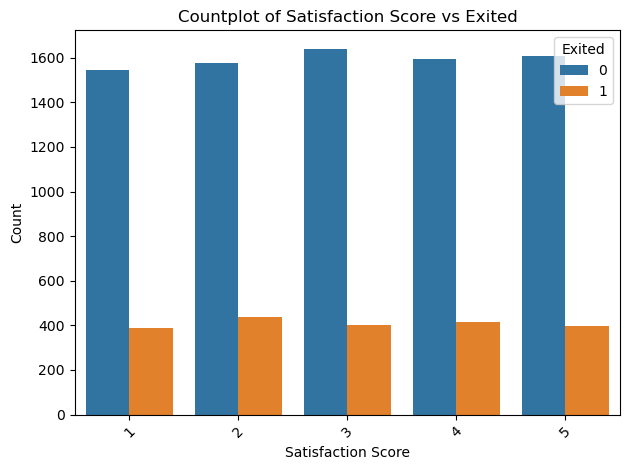

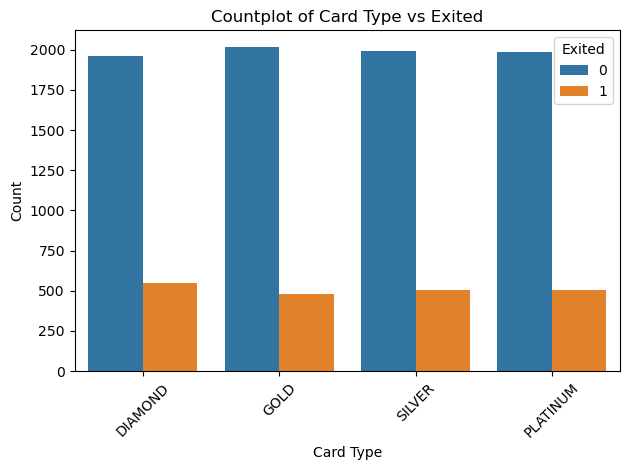

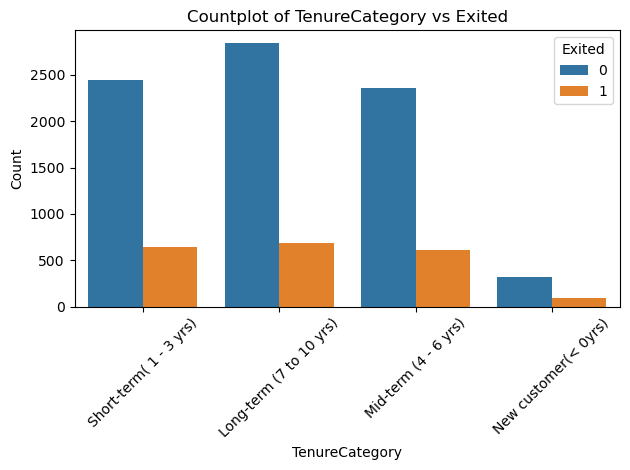

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette (you can choose one that fits your theme)
sns.color_palette("colorblind")

# Loop through predictors to create countplots
for i, predictor in enumerate(df_copy.drop(columns=['Exited', 'CustomerId', 'Surname', 'RowNumber', 'Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned'])):
    plt.figure(i)
    sns.countplot(data=df_copy, x=predictor, hue='Exited')
    
    # Slanting the x-axis labels
    plt.xticks(rotation=45)
    
    plt.title(f'Countplot of {predictor} vs Exited')
    plt.ylabel('Count')
    plt.xlabel(predictor)
    
    plt.legend(title='Exited', loc='upper right')
    plt.tight_layout()  # Adjusts plot to fit into the figure area.
    plt.show()


# Insights from the above data visualization

### Germany people are exitting a lot.
### Female gender exitted more than men.
### People with more products (3 - 4) have preferred to exit.
### People with credit card have exited more compared to people without Credit Card.
### People with complaints definitely exited and people without complains are most likely to stay.

In [29]:
df_copy.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'TenureCategory'],
      dtype='object')

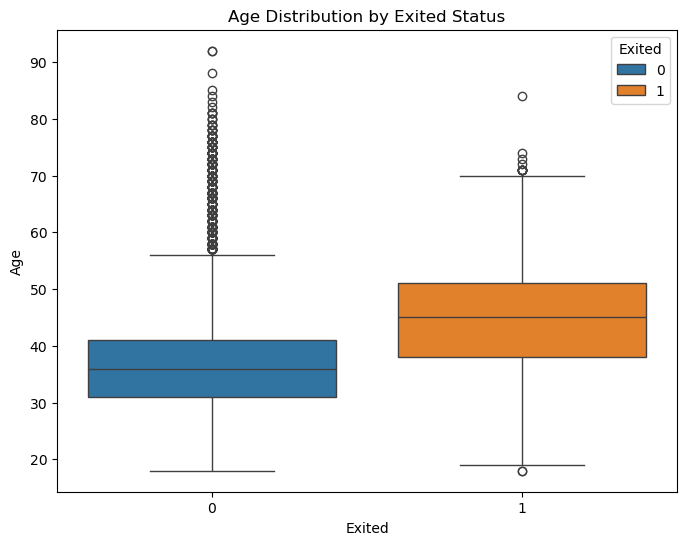

In [30]:
# Set up the plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copy, x='Exited', y='Age',hue='Exited')

# Add titles and labels
plt.title("Age Distribution by Exited Status")
plt.xlabel("Exited")
plt.ylabel("Age")

# Display the plot
plt.show()


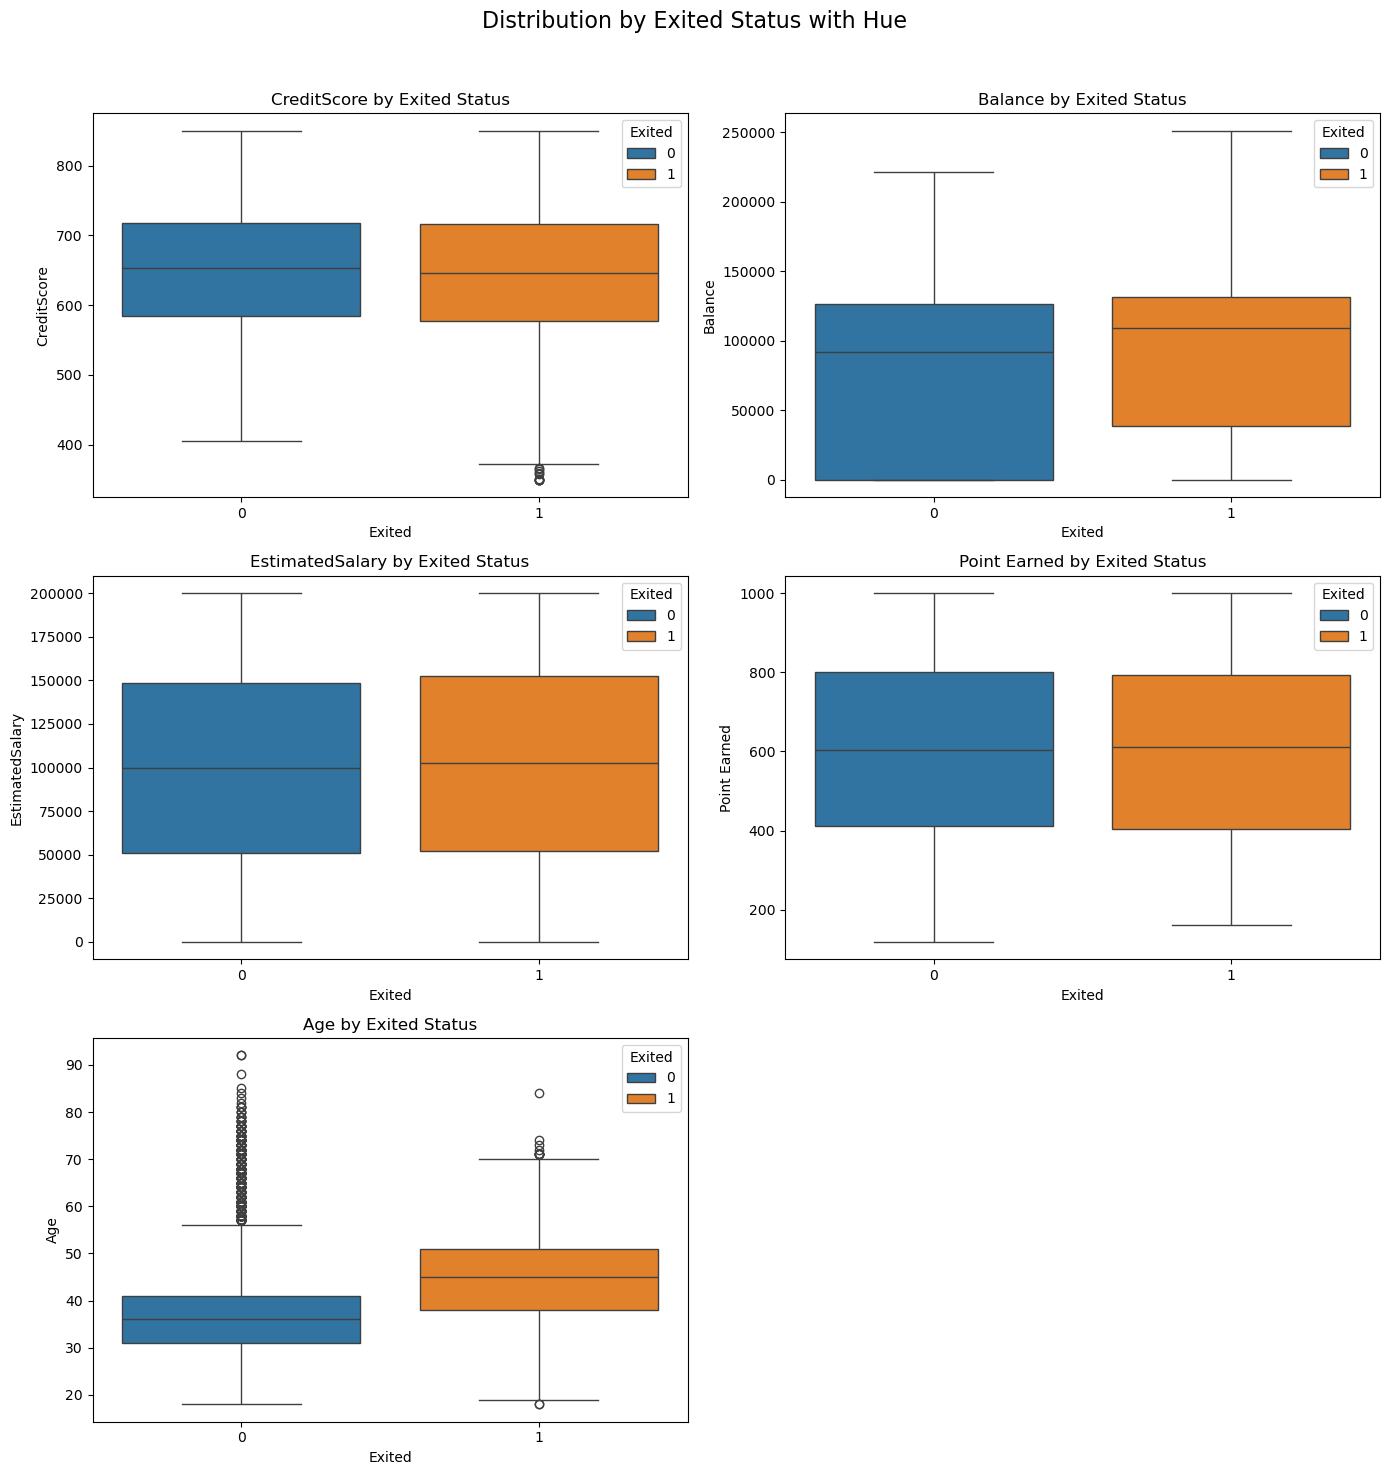

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned', 'Age']

# Set up the plot grid (3 rows, 2 columns for 6 subplots)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))  # 3x2 grid for 5 columns
fig.suptitle("Distribution by Exited Status with Hue", fontsize=16)

# Flatten the axes array correctly for iteration
axes = axes.flatten()

# Loop through columns and create a box plot for each with hue for 'Exited'
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x='Exited', y=col, hue='Exited', ax=axes[i])
    axes[i].set_title(f"{col} by Exited Status")
    axes[i].set_xlabel("Exited")
    axes[i].set_ylabel(col)
    axes[i].legend(title='Exited')  # add legend to each plot

# Hide the extra subplot if the grid has more than needed plots
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


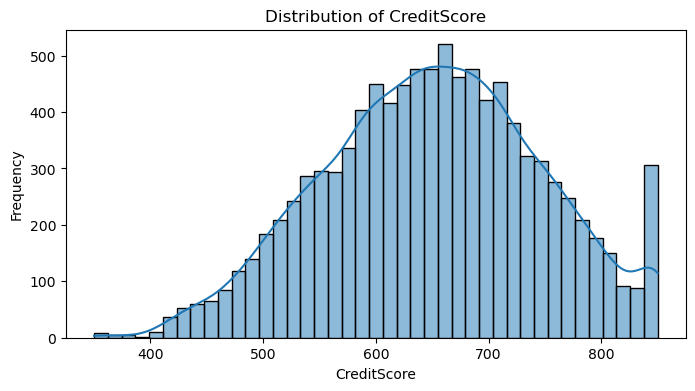

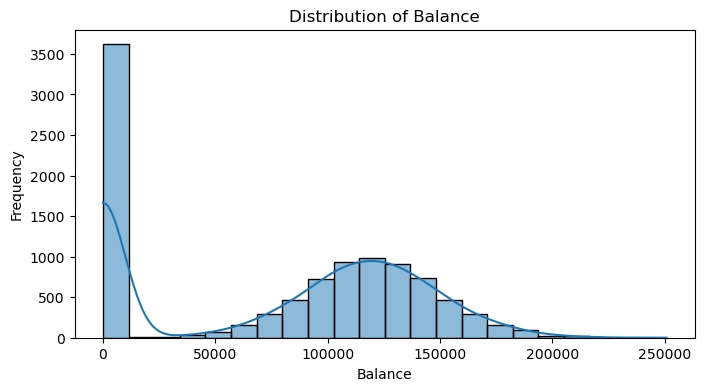

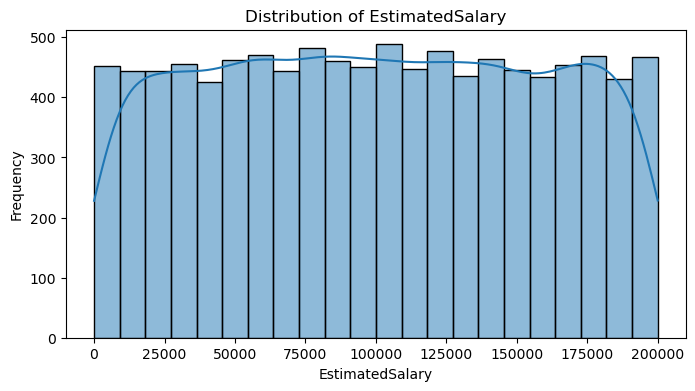

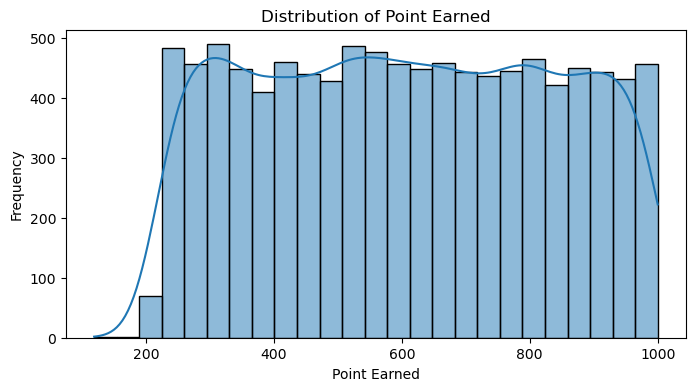

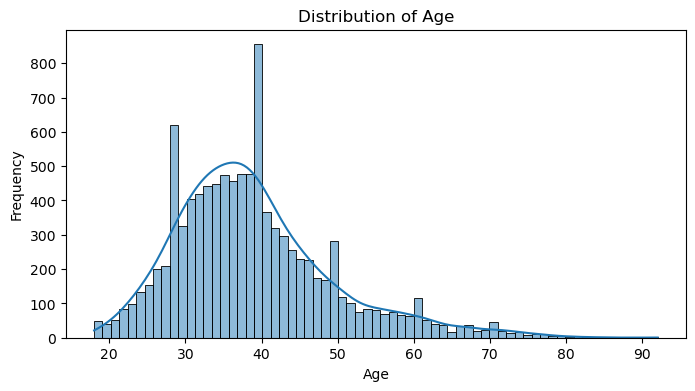

In [32]:
# Histogram and KDE for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_copy[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


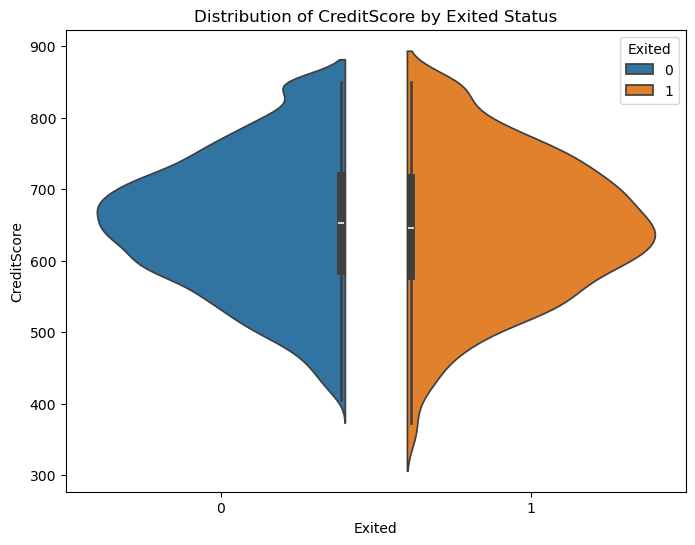

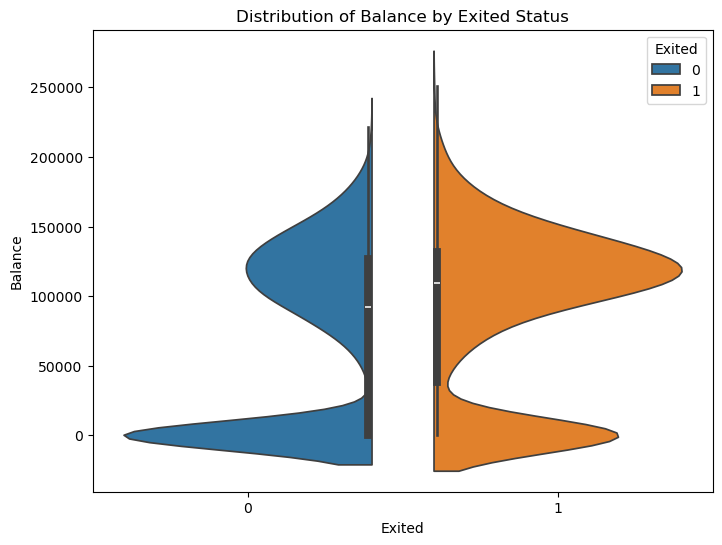

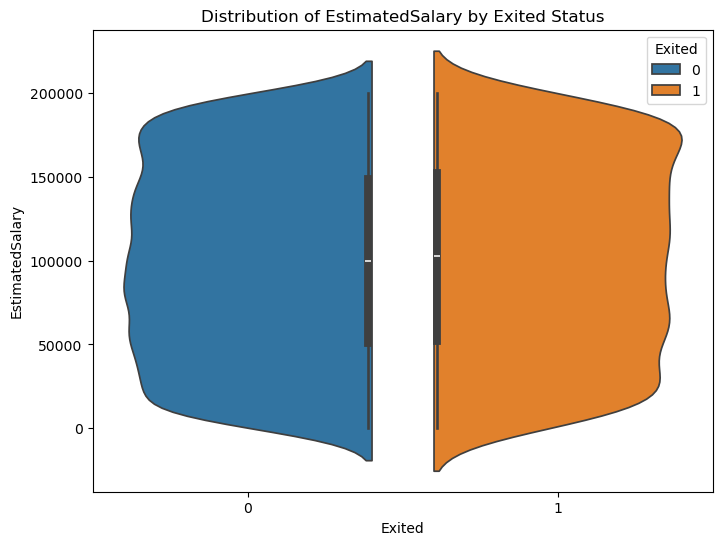

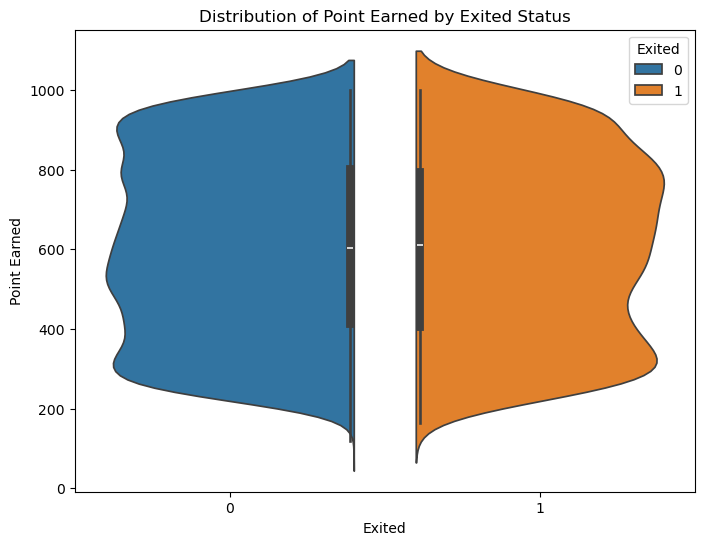

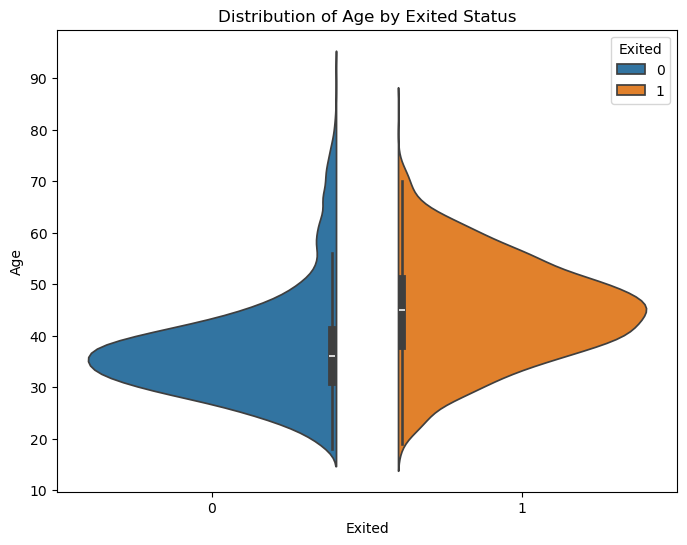

In [33]:
# Violin plot for each numerical variable with 'Exited' hue
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='Exited', y=col, hue='Exited', split=True)
    plt.title(f"Distribution of {col} by Exited Status")
    plt.xlabel("Exited")
    plt.ylabel(col)
    plt.show()


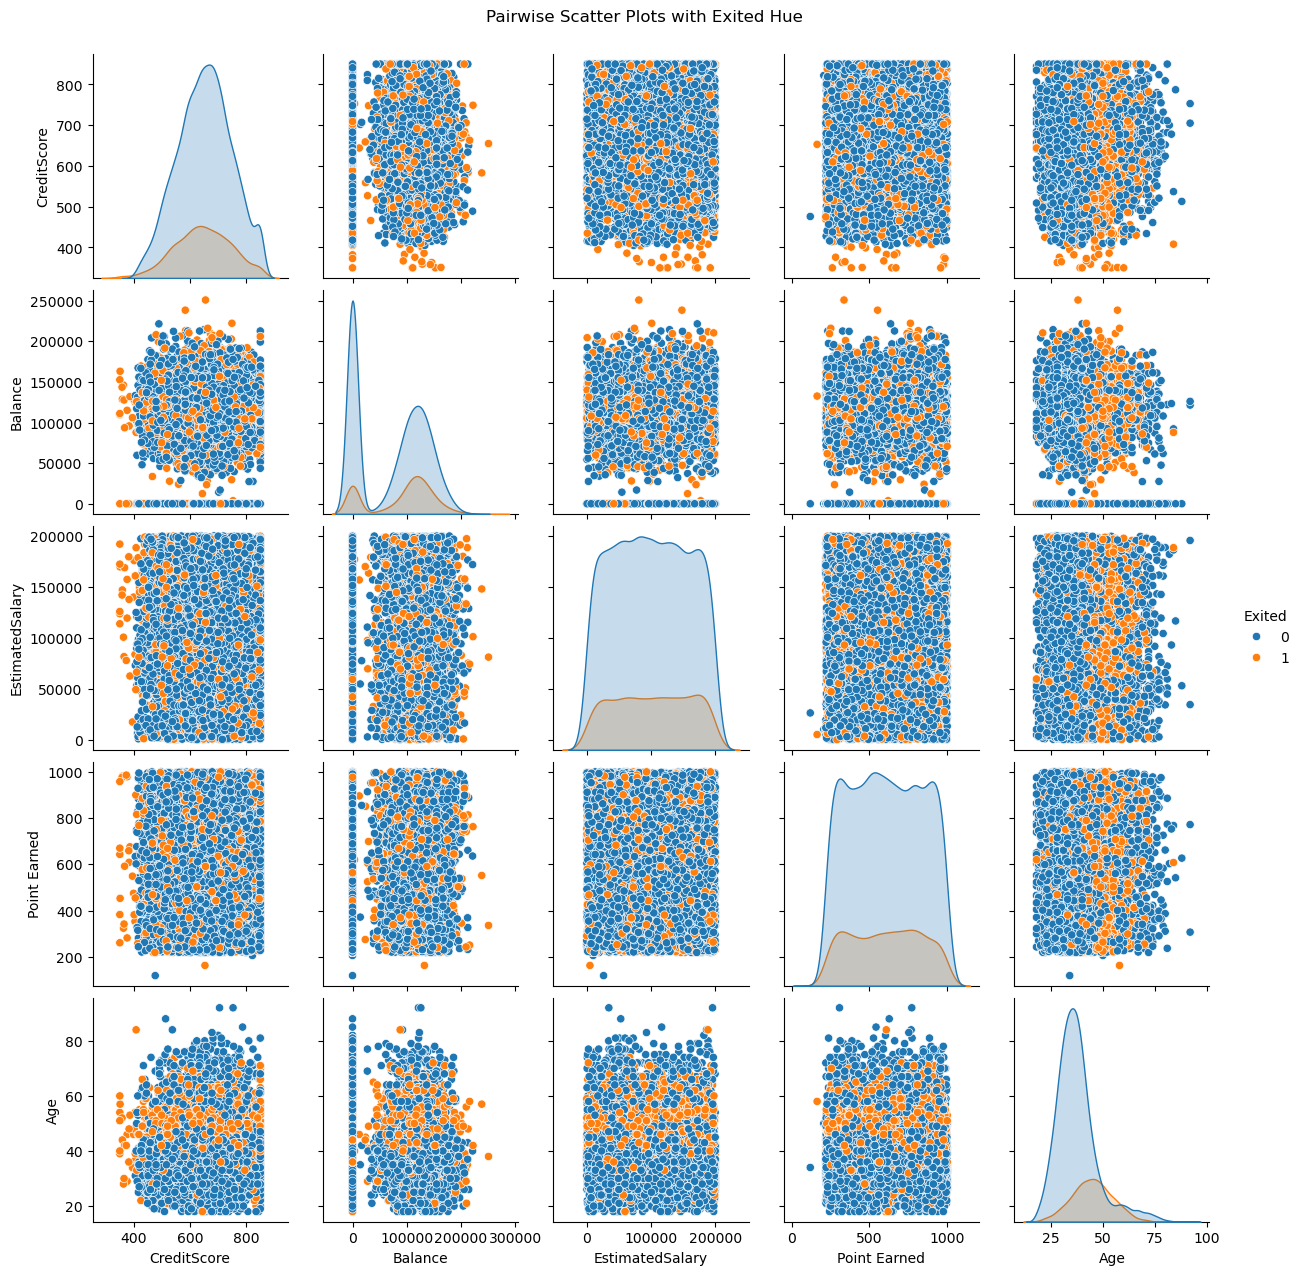

In [34]:
# Scatter plot for each pair of variables with 'Exited' as hue
sns.pairplot(df_copy, hue='Exited', vars=numerical_columns)
plt.suptitle("Pairwise Scatter Plots with Exited Hue", y=1.02)
plt.show()



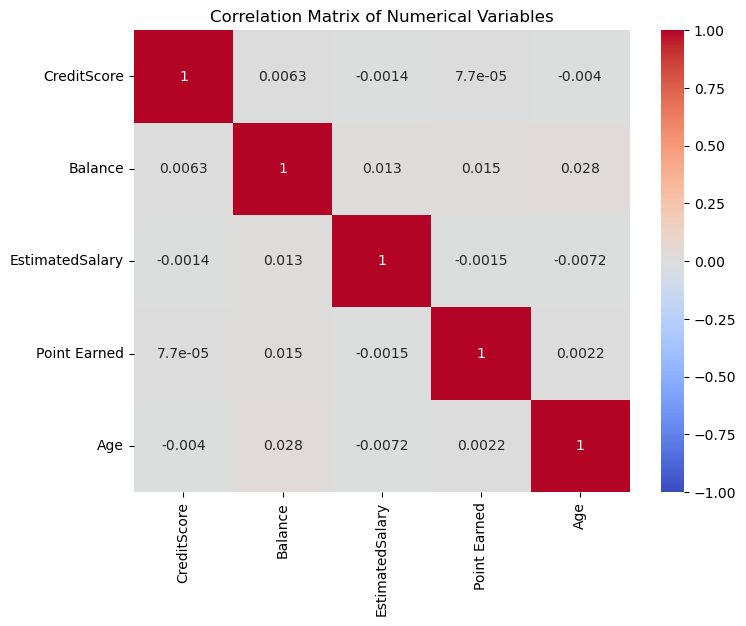

In [35]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
correlation = df_copy[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


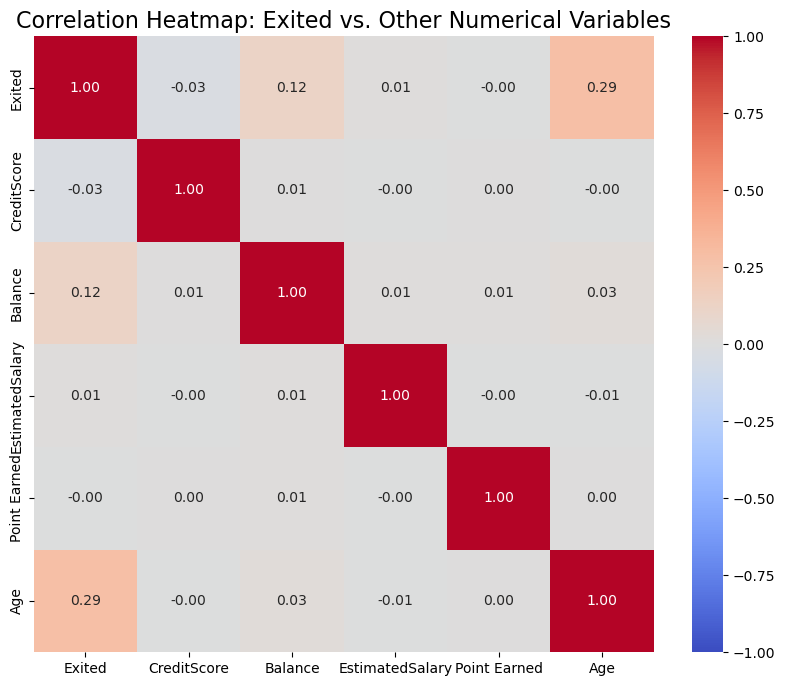

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it already contains the necessary columns

# Encode 'Exited' if it's not numeric (0 and 1)
# If 'Exited' is already numeric, you can skip this step
df_copy['Exited'] = df_copy['Exited'].astype(int)

# Create a new DataFrame with 'Exited' and other numerical columns
columns_of_interest = ['Exited', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned', 'Age']
heatmap_data = df_copy[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

# Add titles and labels
plt.title("Correlation Heatmap: Exited vs. Other Numerical Variables", fontsize=16)
plt.show()


In [37]:
# df_copy.to_csv("df_copy.csv", index=False)


In [38]:
df_copy["IsActiveMember"].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

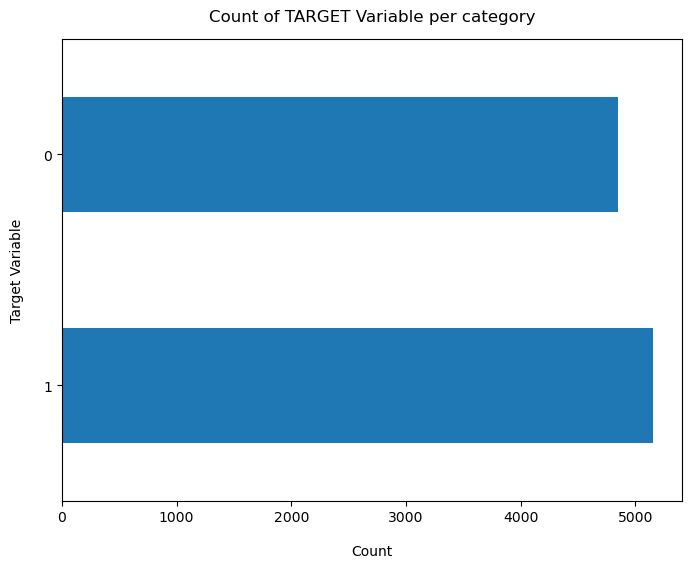

In [39]:
df_copy['IsActiveMember'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

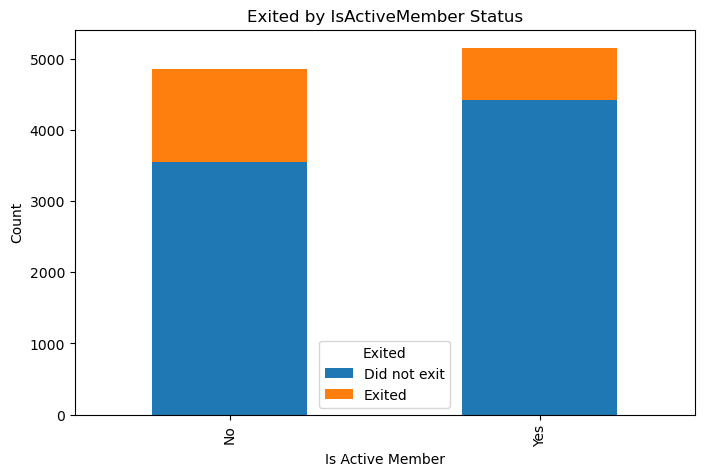

In [40]:
# Create a pivot table
pivot_table = df_copy.pivot_table(index='IsActiveMember', columns='Exited', aggfunc='size', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 5))

# Adding title and labels
plt.title('Exited by IsActiveMember Status')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0 is No and 1 is Yes
plt.legend(title='Exited', labels=['Did not exit', 'Exited'])
plt.show()

In [41]:
df_copy.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,TenureCategory
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464,Short-term( 1 - 3 yrs)
